# Preprocesado

## Introducción

Comenzaremos por la visualización de los datos. Seguirán la eliminación de valores faltantes, normalizacion de los datos numericos, codificacion one-hot de los categóricos, la limpieza del mismo, el análisis de datos desbalanceados, la selección de características y finalmente la separación en test y train en un dataframe diferente para reducir el tiempo de carga una vez realizado todo este proceso

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

En el mismo dataframe, tendremos los datos y el label para hacer más facil las cosas una vez tengamos que hacer selección de características

In [7]:
# Tomamos un conjunto del dataframe original, una muestra aleatoria para evitar posibles patrones 
sample_size = 10000  # número de filas que vamos a leer
total_rows = 3300000  # número total de filas del archivo CSV

# Seleccionar las filas aleatorias para cargar
random_rows = np.random.choice(range(1, total_rows), size=sample_size, replace=False)

# Leer el CSV solo en esas filas seleccionadas (mantenemos el encabezado por temas de esctructura)
df = df = pd.read_csv('train_data.csv', skiprows=lambda x: x != 0 and x not in random_rows)

df_labels = pd.read_csv("train_labels.csv")

Unimos el dataframe a sus etiquetas originales para tenerlo ordenado desde un principio

In [9]:
df = pd.merge(df, df_labels, how="inner", on="ID")

Visualizamos el dataframe que acabamos de crear


In [11]:
df

,ID,Expenditure_AHF,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,...,Infraction_ADWZ,Infraction_MZI,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_ZTLC,Infraction_LSX,Infraction_IBJ,Infraction_DNOU,label
0,3332384230062807045403503235157506853783342305...,2017-08-17,0.945034,0.740627,0.029516,0.990640,0.000383,0.086320,0.004496,0.001878,...,NaN,NaN,0.007971,0.007563,0.002589,NaN,0.005206,0.005419,0.001818,0
1,3337785756535651175437333702358352722774203146...,2017-10-15,0.268692,0.009591,0.045076,0.336187,0.007958,0.369314,0.002253,0.019206,...,NaN,NaN,0.007377,0.007454,0.004435,NaN,0.000608,0.008881,0.009115,0
2,3334443572430302352646177207445725122835275211...,2017-11-14,0.880569,0.208297,0.060311,1.009671,0.008216,0.144434,0.009773,0.007010,...,NaN,NaN,0.002915,0.001282,0.009563,NaN,0.009529,0.002794,0.000718,0
3,3317363203650522657567618377385238740301333846...,2018-03-19,0.706154,0.304003,0.014406,1.006392,0.007437,0.797379,0.141530,0.021008,...,NaN,NaN,0.001127,0.003771,0.007188,NaN,0.005699,0.005396,0.000029,0
4,3315805431481314770375324103627237875372073427...,2017-05-31,0.591431,0.000085,0.003167,0.811643,0.005018,NaN,0.003962,0.003559,...,NaN,NaN,0.009862,0.002408,0.001076,NaN,0.007139,0.000614,0.004419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3523303057553035216730367035868833443721741124...,2018-02-26,0.192076,0.155672,0.146592,0.040520,0.001448,0.178204,0.127657,0.243676,...,NaN,NaN,1.006981,1.007686,0.902112,0.200491,1.003943,0.008977,0.095036,1
9996,3522662773435012035450450060830807643657514384...,2018-01-29,0.770611,0.000285,0.008466,0.813650,0.008333,NaN,0.007995,0.000469,...,NaN,NaN,1.005791,1.007165,0.947415,0.576994,1.005132,0.006550,0.458884,0
9997,3500605374033244287212537210674803304023326704...,2017-07-05,0.652766,0.007385,0.000567,0.814358,0.008221,NaN,0.008460,0.004523,...,NaN,NaN,0.000463,0.006260,0.009180,NaN,0.004978,0.000150,0.001448,0
9998,3553530533787767274030210470637322021535133717...,2017-03-20,0.908218,0.294132,0.051108,1.001190,0.006027,0.137324,0.000462,0.005765,...,NaN,NaN,0.009277,0.000422,0.007683,NaN,0.005686,0.002726,0.005134,0


## Tratamiento de valores faltantes

Estudiemos los valores faltantes por medio de un grafico

<Axes: >

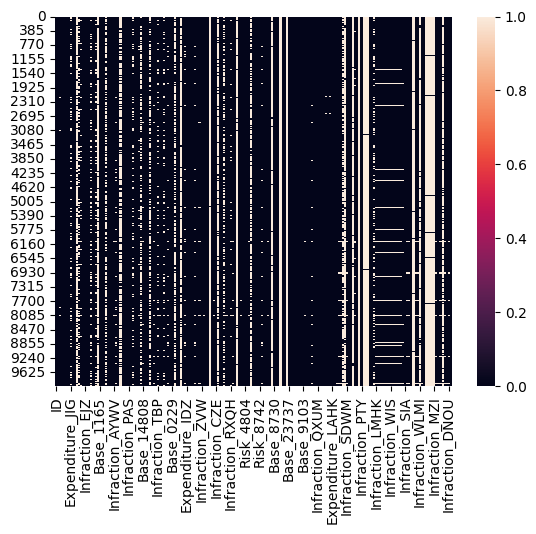

In [14]:
sns.heatmap(df.isnull())

Vemos que hay muchos valores faltantes, tanto en filas como en columnas, comenzaremos borrando tanto las columnas como las filas que tengan un alto porcentaje de valores faltantes. Esto lo hacemos para quitarnos características o entradas que no contengan información o que dificulten el aprendizaje del modelo

In [16]:
pct_missing_columns = df.isnull().mean()*100
cols_to_drop = pct_missing_columns[pct_missing_columns>=90].index.to_list()

In [17]:
cols_to_drop

['Infraction_NCB',
 'Infraction_JVWF',
 'Risk_5797',
 'Base_8379',
 'Infraction_IRKE',
 'Infraction_WEG',
 'Infraction_ANHZ',
 'Infraction_HPLO',
 'Infraction_QGC',
 'Infraction_EBA',
 'Base_64022',
 'Base_3958',
 'Infraction_WLMI',
 'Infraction_SVKR',
 'Infraction_MAN',
 'Infraction_WWLN',
 'Infraction_ADWZ',
 'Infraction_MZI']

In [18]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
df

,ID,Expenditure_AHF,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,...,Infraction_LIES,Risk_5270,Infraction_QWWW,Infraction_YQXM,Infraction_QGR,Infraction_ZTLC,Infraction_LSX,Infraction_IBJ,Infraction_DNOU,label
0,3332384230062807045403503235157506853783342305...,2017-08-17,0.945034,0.740627,0.029516,0.990640,0.000383,0.086320,0.004496,0.001878,...,0.006946,0.009732,0.007971,0.007563,0.002589,NaN,0.005206,0.005419,0.001818,0
1,3337785756535651175437333702358352722774203146...,2017-10-15,0.268692,0.009591,0.045076,0.336187,0.007958,0.369314,0.002253,0.019206,...,0.008175,0.003273,0.007377,0.007454,0.004435,NaN,0.000608,0.008881,0.009115,0
2,3334443572430302352646177207445725122835275211...,2017-11-14,0.880569,0.208297,0.060311,1.009671,0.008216,0.144434,0.009773,0.007010,...,0.006089,0.003168,0.002915,0.001282,0.009563,NaN,0.009529,0.002794,0.000718,0
3,3317363203650522657567618377385238740301333846...,2018-03-19,0.706154,0.304003,0.014406,1.006392,0.007437,0.797379,0.141530,0.021008,...,0.007843,0.000060,0.001127,0.003771,0.007188,NaN,0.005699,0.005396,0.000029,0
4,3315805431481314770375324103627237875372073427...,2017-05-31,0.591431,0.000085,0.003167,0.811643,0.005018,NaN,0.003962,0.003559,...,0.415996,0.009599,0.009862,0.002408,0.001076,NaN,0.007139,0.000614,0.004419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3523303057553035216730367035868833443721741124...,2018-02-26,0.192076,0.155672,0.146592,0.040520,0.001448,0.178204,0.127657,0.243676,...,0.002494,0.008581,1.006981,1.007686,0.902112,0.200491,1.003943,0.008977,0.095036,1
9996,3522662773435012035450450060830807643657514384...,2018-01-29,0.770611,0.000285,0.008466,0.813650,0.008333,NaN,0.007995,0.000469,...,0.009426,0.000708,1.005791,1.007165,0.947415,0.576994,1.005132,0.006550,0.458884,0
9997,3500605374033244287212537210674803304023326704...,2017-07-05,0.652766,0.007385,0.000567,0.814358,0.008221,NaN,0.008460,0.004523,...,0.002433,0.009179,0.000463,0.006260,0.009180,NaN,0.004978,0.000150,0.001448,0
9998,3553530533787767274030210470637322021535133717...,2017-03-20,0.908218,0.294132,0.051108,1.001190,0.006027,0.137324,0.000462,0.005765,...,0.009032,0.001507,0.009277,0.000422,0.007683,NaN,0.005686,0.002726,0.005134,0


In [20]:
pct_missing_rows = df.isnull().mean(axis=1)*100
rows_to_drop = pct_missing_rows[pct_missing_rows>=75].index.to_list()

In [21]:
rows_to_drop

[]

Con esto hecho, siguen habiendo muchos valores faltantes, tal y como se ve en el gráfico de abajo. Así, optamos por tomar la moda de cada característica y rellenar los elementos faltantes con esta, asegurando que el conjunto de datos sea más completo y que podamos proceder con el entrenamiento del modelo sin perder información valiosa.

<Axes: >

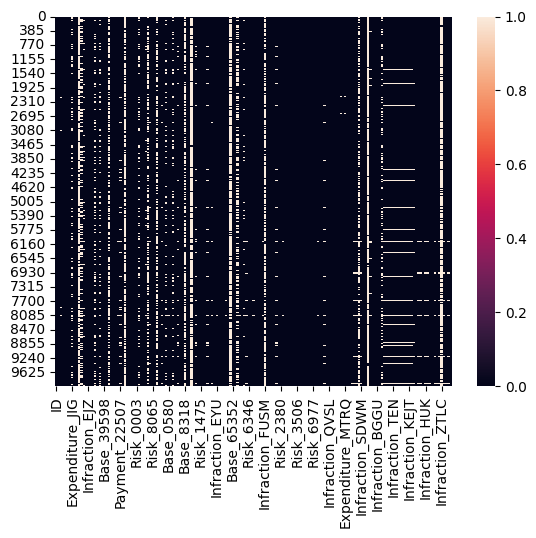

In [23]:
sns.heatmap(df.isnull())

In [24]:
df = df.apply(lambda col: col.fillna(col.mode()[0]))

<Axes: >

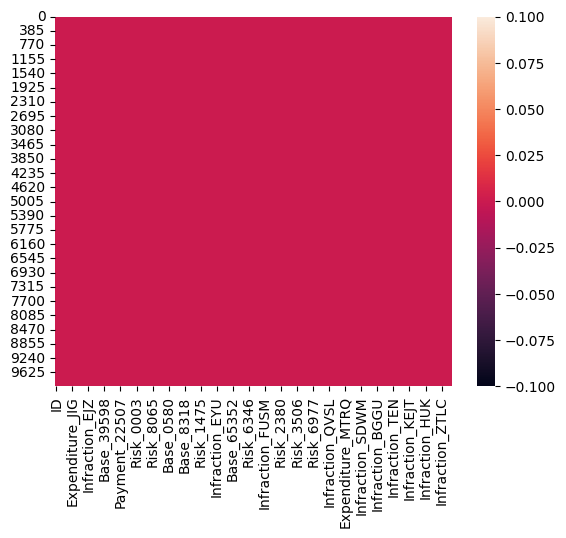

In [25]:
sns.heatmap(df.isna())

Con esto concluye el tratamiento de datos faltantes

## One-Hot y normalización

En este apartado estudiamos los tipos de datos que tenemos en el dataframe y como hacerlos optimos para el aprendizaje.                                
Comenzamos por los objetos

In [29]:
df.dtypes.value_counts()

float64    164
object       7
int64        2
Name: count, dtype: int64

In [30]:
df.select_dtypes(include="object")

,ID,Expenditure_AHF,Infraction_YFSG,Infraction_DQLY,Infraction_CLH,Base_67254,Infraction_TEN
0,3332384230062807045403503235157506853783342305...,2017-08-17,CR,O,high,moderate_low,very_high
1,3337785756535651175437333702358352722774203146...,2017-10-15,CO,O,low,moderate,moderate_high
2,3334443572430302352646177207445725122835275211...,2017-11-14,CO,O,very_high,moderate_low,high
3,3317363203650522657567618377385238740301333846...,2018-03-19,CL,O,high,moderate,moderate
4,3315805431481314770375324103627237875372073427...,2017-05-31,CO,O,moderate_high,low,moderate_low
...,...,...,...,...,...,...,...
9995,3523303057553035216730367035868833443721741124...,2018-02-26,CO,U,low,moderate,moderate
9996,3522662773435012035450450060830807643657514384...,2018-01-29,CO,U,low,low,moderate
9997,3500605374033244287212537210674803304023326704...,2017-07-05,CO,U,moderate_high,low,extremely_low
9998,3553530533787767274030210470637322021535133717...,2017-03-20,CO,O,high,moderate_low,very_high


Tenemos una fecha en formato YYYY-MM-DD, la cual separaremos en tres columnas year,month,day (ya que muchos modelos no aceptan el formato datetime) y el resto de columnas parecen indicar una clara categorización (excluyendo ID, que solo nos indica el cliente, esta no debe transformarse). Nos guardamos las columnas con valores numéricos para un futuro

In [32]:
df["Expenditure_AHF"] = pd.to_datetime(df["Expenditure_AHF"])

In [33]:
df["year"] = df['Expenditure_AHF'].dt.year
df["month"] = df['Expenditure_AHF'].dt.month
df["day"] = df['Expenditure_AHF'].dt.day

df.drop("Expenditure_AHF", axis=1, inplace=True)

In [34]:
cols_cat = df.select_dtypes(include="object").nunique()/df.shape[0]
cols_cat

ID                 0.9832
Infraction_YFSG    0.0006
Infraction_DQLY    0.0004
Infraction_CLH     0.0007
Base_67254         0.0007
Infraction_TEN     0.0007
dtype: float64

Podemos ver que el porcentaje de valores distintos es impresionantemente bajo, lo cual nos da seguridad en hacer one-hot encoding con estos

In [36]:
ID = df.ID
df = pd.get_dummies(df.drop("ID", axis=1))
df["ID"] = ID

Tal y como ya explicamos en el tratamiento de valores faltantes, columnas con demasiados unos o ceros en el one-hot encoding son contraproducentes para el aprendizaje, luego nos deshacemos de ellas de igual forma

In [38]:
only_ones = (df == 1).mean()*100
only_ones = only_ones[only_ones>=80]
only_ones = only_ones.index.to_list()
only_zeros = (df == 0).mean()*100
only_zeros = only_zeros[only_zeros>=80]
only_zeros = only_zeros.index.to_list()
borrar = only_ones+only_zeros

In [39]:
borrar

['Infraction_HPS',
 'Base_23737',
 'Base_8730',
 'Infraction_ZRH',
 'Infraction_WIS',
 'Infraction_YFSG_CL',
 'Infraction_YFSG_CR',
 'Infraction_YFSG_XL',
 'Infraction_YFSG_XM',
 'Infraction_YFSG_XZ',
 'Infraction_DQLY_-1',
 'Infraction_DQLY_R',
 'Infraction_CLH_low',
 'Infraction_CLH_moderate',
 'Infraction_CLH_moderate_high',
 'Infraction_CLH_moderate_low',
 'Infraction_CLH_very_low',
 'Base_67254_extremely_high',
 'Base_67254_high',
 'Base_67254_moderate_high',
 'Base_67254_very_high',
 'Infraction_TEN_high',
 'Infraction_TEN_low',
 'Infraction_TEN_moderate_low',
 'Infraction_TEN_very_high']

In [40]:
df.drop(borrar, axis=1, inplace=True)

In [41]:
numerales = df.select_dtypes(include="number").columns.to_list()
numerales.remove("label")

In [42]:
df

,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_SBF,Infraction_ZWWJ,...,Infraction_DQLY_U,Infraction_CLH_high,Infraction_CLH_very_high,Base_67254_low,Base_67254_moderate,Base_67254_moderate_low,Infraction_TEN_extremely_low,Infraction_TEN_moderate,Infraction_TEN_moderate_high,ID
0,0.945034,0.740627,0.029516,0.990640,0.000383,0.086320,0.004496,0.001878,0.000315,0.045690,...,False,True,False,False,False,True,False,False,False,3332384230062807045403503235157506853783342305...
1,0.268692,0.009591,0.045076,0.336187,0.007958,0.369314,0.002253,0.019206,0.152972,0.000038,...,False,False,False,False,True,False,False,False,True,3337785756535651175437333702358352722774203146...
2,0.880569,0.208297,0.060311,1.009671,0.008216,0.144434,0.009773,0.007010,0.000315,0.037679,...,False,False,True,False,False,True,False,False,False,3334443572430302352646177207445725122835275211...
3,0.706154,0.304003,0.014406,1.006392,0.007437,0.797379,0.141530,0.021008,0.000315,0.068693,...,False,True,False,False,True,False,False,True,False,3317363203650522657567618377385238740301333846...
4,0.591431,0.000085,0.003167,0.811643,0.005018,-0.201819,0.003962,0.003559,0.000315,0.058548,...,False,False,False,True,False,False,False,False,False,3315805431481314770375324103627237875372073427...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.192076,0.155672,0.146592,0.040520,0.001448,0.178204,0.127657,0.243676,0.000315,0.041341,...,True,False,False,False,True,False,False,True,False,3523303057553035216730367035868833443721741124...
9996,0.770611,0.000285,0.008466,0.813650,0.008333,-0.201819,0.007995,0.000469,0.000315,0.126861,...,True,False,False,True,False,False,False,True,False,3522662773435012035450450060830807643657514384...
9997,0.652766,0.007385,0.000567,0.814358,0.008221,-0.201819,0.008460,0.004523,0.000315,0.029538,...,True,False,False,True,False,False,True,False,False,3500605374033244287212537210674803304023326704...
9998,0.908218,0.294132,0.051108,1.001190,0.006027,0.137324,0.000462,0.005765,0.000315,0.011226,...,False,True,False,False,False,True,False,False,False,3553530533787767274030210470637322021535133717...


Procedemos a normalizar las columnas numéricas que antes guardamos. Esto podríamos hacerlo por el método minmax, pero por motivos de entrenamiento de los futuros modelos, elegimos el standardscaler. Entonces aplicamos un standardscaler a todos los valores numéricos menos las etiquetas

In [44]:
from sklearn.preprocessing import StandardScaler

# Iniciamos el normalizador
scaler = StandardScaler()

# Normaliza todas las columnas numéricas del DataFrame
df[numerales]= pd.DataFrame(scaler.fit_transform(df[numerales]))
df[numerales] = df[numerales]
df

,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_SBF,Infraction_ZWWJ,...,Infraction_DQLY_U,Infraction_CLH_high,Infraction_CLH_very_high,Base_67254_low,Base_67254_moderate,Base_67254_moderate_low,Infraction_TEN_extremely_low,Infraction_TEN_moderate,Infraction_TEN_moderate_high,ID
0,1.151295,2.191585,-0.441509,0.913797,-0.348390,-0.262057,-0.272021,-0.548226,-0.250707,-0.299150,...,False,True,False,False,False,True,False,False,False,3332384230062807045403503235157506853783342305...
1,-1.497480,-0.537984,-0.366937,-0.723634,-0.313709,0.904093,-0.283410,-0.473091,1.176000,-0.520071,...,False,False,False,False,True,False,False,False,True,3337785756535651175437333702358352722774203146...
2,0.898829,0.203952,-0.293916,0.961411,-0.312530,-0.022584,-0.245233,-0.525976,-0.250707,-0.337920,...,False,False,True,False,False,True,False,False,False,3334443572430302352646177207445725122835275211...
3,0.215764,0.561303,-0.513925,0.953207,-0.316094,2.668046,0.423620,-0.465278,-0.250707,-0.187833,...,False,True,False,False,True,False,False,True,False,3317363203650522657567618377385238740301333846...
4,-0.233529,-0.573475,-0.567792,0.465949,-0.327171,-1.449410,-0.274733,-0.540939,-0.250707,-0.236926,...,False,False,False,True,False,False,False,False,False,3315805431481314770375324103627237875372073427...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.797535,0.007462,0.119601,-1.463386,-0.343517,0.116575,0.353192,0.500220,-0.250707,-0.320196,...,True,False,False,False,True,False,False,True,False,3523303057553035216730367035868833443721741124...
9996,0.468200,-0.572731,-0.542396,0.470970,-0.311991,-1.449410,-0.254262,-0.554337,-0.250707,0.093654,...,True,False,False,True,False,False,False,True,False,3522662773435012035450450060830807643657514384...
9997,0.006681,-0.546218,-0.580254,0.472741,-0.312508,-1.449410,-0.251900,-0.536760,-0.250707,-0.377313,...,True,False,False,True,False,False,True,False,False,3500605374033244287212537210674803304023326704...
9998,1.007112,0.524445,-0.338024,0.940192,-0.322549,-0.051884,-0.292501,-0.531373,-0.250707,-0.465931,...,False,True,False,False,False,True,False,False,False,3553530533787767274030210470637322021535133717...


## Análisis de datos desbalanceados

Veamos cuantos valores tiene cada categoría.

In [47]:
df_labels.label.value_counts()

label
0    203889
1     71458
Name: count, dtype: int64

La diferencia es demasiado grande. Dado que tenemos una cantidad desmedida de entradas, haremos undersampling para hacer las cosas mas sencillas. En cuanto al modelo a usar, elegimos el random por su sencillez.

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Separamos las características de la etiqueta
X = df.drop(columns=['label'])  # Características
y = df['label']                  # Etiquetas


# Aplicar muestreo aleatorio para balancear las clases
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

# Crear el nuevo DataFrame usando pd.concat para evitar el warning
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

df_resampled


,Payment_6804,Infraction_CGP,Base_7744,Base_80863,Risk_1930,Expenditure_JIG,Infraction_SNZ,Base_02683,Infraction_SBF,Infraction_ZWWJ,...,Infraction_CLH_high,Infraction_CLH_very_high,Base_67254_low,Base_67254_moderate,Base_67254_moderate_low,Infraction_TEN_extremely_low,Infraction_TEN_moderate,Infraction_TEN_moderate_high,ID,label
6111,-0.196254,-0.558400,-0.549960,0.477811,-0.305620,0.821317,-0.280046,-0.531854,-0.250707,0.589293,...,True,False,False,False,True,True,False,False,3457273477323221307023205034725805347751344575...,0
5095,1.008167,-0.539717,-0.570734,0.958930,-0.336424,0.051748,-0.265130,-0.535264,-0.250707,-0.520071,...,False,True,False,False,True,True,False,False,5345543214422063578273641004640026264373754062...,0
9232,0.884177,-0.572360,-0.529039,0.960048,-0.338845,1.104409,-0.275801,-0.527945,-0.250707,-0.337164,...,False,True,False,False,True,False,True,False,5452384230214240443337733484333523788320423341...,0
1337,0.666362,-0.226029,-0.470902,0.465564,-0.304941,0.078336,-0.260443,-0.497031,-0.250707,0.237608,...,True,False,True,False,False,True,False,False,8102277156053536623552078382132773246333553536...,0
7489,0.847189,-0.572263,-0.574049,0.485715,-0.346689,-1.449410,-0.255025,-0.541884,-0.250707,-0.520071,...,False,True,True,False,False,False,False,True,2527002420573505472234382630033747712253515882...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,-0.034316,0.669067,0.278342,-1.013083,-0.316227,0.267947,-0.273120,0.543296,-0.250707,1.382329,...,True,False,False,True,False,True,False,False,3515300602836730103330230884604006852533565732...,1
9985,0.646856,1.319370,-0.458151,0.956826,-0.343379,0.051384,-0.244619,-0.513362,-0.250707,0.542934,...,False,False,False,False,True,False,True,False,3515371721334320384785401353053450037734575761...,1
9990,-0.275581,1.867054,1.877740,0.480814,1.951048,3.133191,-0.261886,-0.518089,0.531471,0.537125,...,False,True,True,False,False,False,False,True,3563634477153026406706513307352055565753365455...,1
9994,-0.329702,-0.456135,0.495557,-1.512142,-0.345594,0.442554,0.373209,2.808464,-0.250707,0.007413,...,False,True,False,False,False,False,False,False,3520328240044534565636053567575383020257250141...,1


Así queda nuestro dataframe tras el undersampling

In [51]:
y.value_counts()

label
0    7572
1    2428
Name: count, dtype: int64

In [52]:
y_resampled.value_counts()

label
0    2428
1    2428
Name: count, dtype: int64

## Selección de características

Aunque para esta práctica es necesario usar los tres métodos que conocemos (embebido, filtro y wrapper), escogeremos los del filtro por las propiedades de nuestros datos (no sabemos en qué modelo los vamos a usar, necesitamos algo rápido y que nos reduzca las características insignificantes; pues si eligieramos algo más artificioso la dimensión haría de los calculos algo demasiado lento)

### Embebido con Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separando características y variable objetivo
X = df_resampled.drop(["label","ID"], axis=1)  # Las características normalizadas
y = df_resampled['label']

# Convertir etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos el modelo (RandomForestClassifier)
model = RandomForestClassifier()

# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Usamos SelectFromModel para seleccionar las características importantes
selector = SelectFromModel(estimator=model, threshold="mean")
selector.fit(X_train, y_train)

# Ver qué características fueron seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Filtrar el DataFrame original para obtener solo las características seleccionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

Características seleccionadas: Index(['Payment_6804', 'Base_7744', 'Base_80863', 'Risk_1930',
       'Expenditure_JIG', 'Base_02683', 'Infraction_SBF', 'Infraction_QJJF',
       'Base_76065', 'Infraction_EJZ', 'Infraction_GGO', 'Infraction_TLPJ',
       'Base_1165', 'Base_39598', 'Base_6187', 'Base_85131', 'Risk_9995',
       'Infraction_AYWV', 'Payment_22507', 'Base_9516', 'Base_36384',
       'Expenditure_HMO', 'Infraction_BSU', 'Infraction_TBP', 'Infraction_PBC',
       'Base_0229', 'Base_69608', 'Base_91828', 'Base_6852', 'Base_3041',
       'Payment_3207', 'Infraction_QKZN', 'Infraction_CZE', 'Base_9103',
       'Base_2810', 'Base_4569'],
      dtype='object')


### Wrapper con arbol de decisión

In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

# Entrena el modelo en X_train
clf = ExtraTreesClassifier(n_estimators=40)
clf.fit(X_train, y_train)

# Crear el objeto SelectFromModel e incluir nombres de características
model = SelectFromModel(clf, prefit=True, threshold = "2*mean") # Ponemos un threshold para quedarnos con las verdaderamente importantes
model.feature_names_in_ = X.columns  # Agregamos los nombres de características manualmente para evitar avisos

# Transformar X
nueva_X = model.transform(X)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[model.get_support()]
print(selected_features.to_list())

['Payment_6804', 'Base_80863', 'Base_02683', 'Infraction_QJJF', 'Infraction_TLPJ', 'Base_6187', 'Base_85131', 'Infraction_BSU', 'Infraction_ZYW', 'Infraction_TBP', 'Base_69608', 'Payment_3207', 'Base_9103', 'Base_67254_moderate_low']


### Filtro

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
selector = SelectKBest(score_func=f_classif, k=17)  # Selecciona las 40 mejores características
selector.fit(X_train, y_train)

# Vemos los puntajes de las características
scores = selector.scores_
selected_features = X_train.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Mostramos los puntajes de cada característica
feature_scores = pd.DataFrame({'Característica': X_train.columns, 'Puntaje': scores})
feature_scores.sort_values(by='Puntaje', ascending=False)


Características seleccionadas: Index(['Payment_6804', 'Base_80863', 'Base_02683', 'Infraction_QJJF',
       'Infraction_TLPJ', 'Base_39598', 'Base_85131', 'Infraction_BSU',
       'Infraction_ZYW', 'Infraction_TBP', 'Base_0229', 'Base_8318',
       'Base_69608', 'Base_3041', 'Infraction_QKZN', 'Infraction_CZE',
       'Base_9103'],
      dtype='object')


,Característica,Puntaje
0,Payment_6804,2355.405280
17,Infraction_TLPJ,1809.861606
53,Base_69608,1731.626462
46,Infraction_TBP,1640.696040
3,Base_80863,1389.444163
...,...,...
95,Expenditure_HKXV,0.092789
166,Infraction_CLH_high,0.042746
108,Risk_6197,0.032461
47,Base_0580,0.009518


Tras prueba y error en el entrenamiento de los modelos, decidimos quedarnos con las características con puntaje superior a 750, unas 17

16


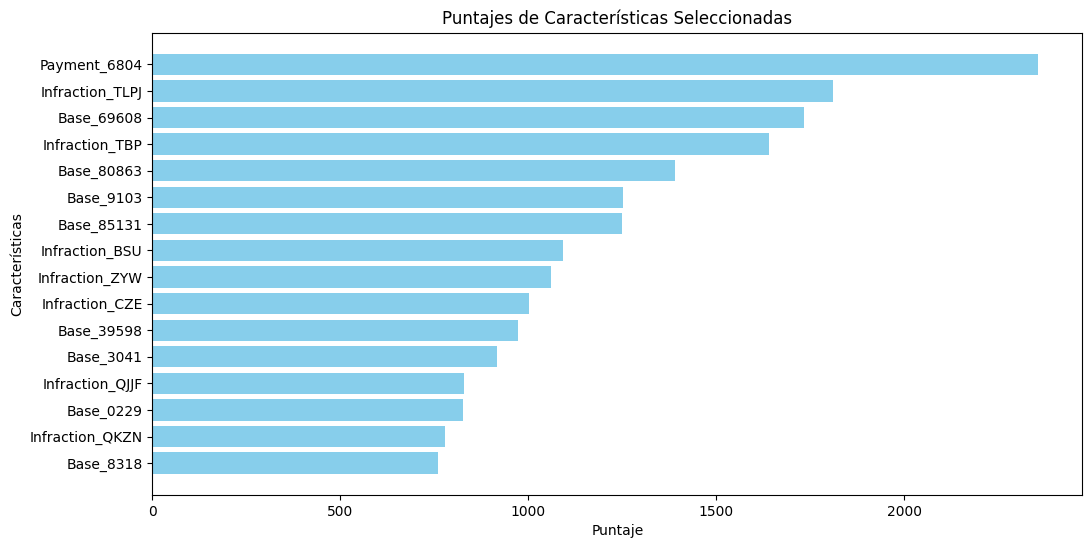

In [71]:
# Crea un DataFrame con las características seleccionadas y sus puntajes
feature_scores = pd.DataFrame({'Característica': X_train.columns, 'Puntaje': scores})
feature_scores = feature_scores.sort_values(by='Puntaje', ascending=False)
feature_scores = feature_scores[feature_scores["Puntaje"]>750]
print(feature_scores.shape[0])
# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(feature_scores['Característica'], feature_scores['Puntaje'], color='skyblue')
plt.xlabel('Puntaje')
plt.ylabel('Características')
plt.title('Puntajes de Características Seleccionadas')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica con el puntaje más alto esté en la parte superior
plt.show()

## Funciones preproceso

El dataframe es demasiado grande, luego despues de comprobar que nuestro código funciona, haremos una función preproceso para aplicarla iterativamente a fragmentos del mismo hasta poder reconstruirlo y escribirlo en un nuevo archivo

Esta primera funcion está pensada para la selección de características, pasaremos el dataframe por chunks y esta se encargará de limpiarlos. Añadimos la función de pasarle las columnas que queremos que use, para un futuro.

In [131]:
def preproceso(df, mas_comunes = None):
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    from imblearn.under_sampling import RandomUnderSampler

    # Cargar etiquetas y unirlas al dataframe original
    df_labels = pd.read_csv("train_labels.csv")
    df = pd.merge(df, df_labels, how="left", on="ID")

    # Eliminar columnas con más del 90% de datos faltantes
    pct_missing_columns = df.isnull().mean() * 100
    cols_to_drop = pct_missing_columns[pct_missing_columns >= 90].index.to_list()
    df.drop(cols_to_drop, axis=1, inplace=True)

    # Eliminar filas con más del 75% de datos faltantes
    pct_missing_rows = df.isnull().mean(axis=1) * 100
    rows_to_drop = pct_missing_rows[pct_missing_rows >= 75].index.to_list()
    df.drop(rows_to_drop, axis=1, inplace=True)

    # Imputar los valores faltantes con la moda de cada columna
    df = df.apply(lambda col: col.fillna(col.mode()[0]))


    # Procesar la columna de fechas
    df["Expenditure_AHF"] = pd.to_datetime(df["Expenditure_AHF"])
    df["year"] = df["Expenditure_AHF"].dt.year
    df["month"] = df["Expenditure_AHF"].dt.month
    df["day"] = df["Expenditure_AHF"].dt.day
    df.drop("Expenditure_AHF", axis=1, inplace=True)

    # Convertir la columna 'ID' en una variable dummy y conservarla separada
    ID = df.ID
    df = pd.get_dummies(df.drop("ID", axis=1))
    df["ID"] = ID

    # Eliminar columnas con más del 80% de valores iguales a 1 o 0
    only_ones = (df == 1).mean() * 100
    only_ones = only_ones[only_ones >= 80].index.to_list()
    only_zeros = (df == 0).mean() * 100
    only_zeros = only_zeros[only_zeros >= 80].index.to_list()
    borrar = only_ones + only_zeros
    df.drop(borrar, axis=1, inplace=True)

    # Normalizar las columnas numéricas
    numerales = df.select_dtypes(include="number").columns.to_list()
    numerales.remove("label")
    scaler = StandardScaler()
    df[numerales] = scaler.fit_transform(df[numerales])

    # Separar características y etiquetas
    X = df.drop(columns=['label'])
    y = df['label']

    # Aplicar muestreo aleatorio para balancear las clases
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)

    # Crear el nuevo DataFrame usando pd.concat para evitar el warning
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='label')], axis=1)

    if mas_comunes != None:
        df_resampled = df_resampled[mas_comunes] 

    return df_resampled

Una vez limpios, necesitamos una funcion que obtenga las columnas mediante un método filtro


In [134]:
def getColumns(df_limpio):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_selection import SelectKBest, f_classif
    from sklearn.model_selection import train_test_split

    X = df_limpio.drop(["label", "ID"], axis=1)  # Las características normalizadas
    y = df_limpio['label']

    # Convertir etiquetas de texto a valores numéricos
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    selector = SelectKBest(score_func=f_classif, k=30)  # Selecciona las 30 mejores características
    selector.fit(X_train, y_train)
    
    # Vemos los puntajes de las características
    scores = selector.scores_
    selected_features = X_train.columns[selector.get_support()]

    # Mostramos los puntajes de cada característica
    feature_scores = pd.DataFrame({'Característica': X_train.columns, 'Puntaje': scores})
    return(feature_scores.Característica.values.tolist())
    


Juntamos todas estas ideas en el mismo método. Como finalmente vamos a predecir si un usuario es moroso o no en contexto de su actividad con el banco, el ultimo paso para tener nuestro dataframe final es agrupar por ID, el cual sabemos que no siempre es unico. Las características que tomaremos de esto serán la media y la varianza, devolviendonos 34 columnas en lugar de 17.

In [137]:
def final(ruta_archivo, ruta_salida, tamaño_fragmento=100000):
    from collections import Counter
    import pandas as pd

    # Obtenemos las columnas más importantes de cada chunk
    lista_columnas = []
    for i, fragmento in enumerate(pd.read_csv(ruta_archivo, chunksize=tamaño_fragmento)):
        # Aplica el preproceso a cada fragmento
        lista_columnas.append(getColumns(preproceso(fragmento)))  # Paréntesis corregido
        print(i)
    # Ahora que tenemos todas las columnas, vamos a coger las 40 que más se repiten
    # Aplanar la lista de listas en una sola lista
    lista_aplanada = [elemento for sublista in lista_columnas for elemento in sublista]
    
    # Contar la frecuencia de cada string
    contador = Counter(lista_aplanada)
    
    # Obtener los 17 strings más comunes (según el gráfico, los 17 que están por encima de 750 puntos
    mas_comunes = [elemento for elemento, _ in contador.most_common(17)]
    mas_comunes += ["ID"]
    print(mas_comunes)
    # Preprocesamos por chunks, pero para hacer el groupby lo necesitamos entero
    dfs_list = []
    for i, fragmento in enumerate(pd.read_csv(ruta_archivo, chunksize=tamaño_fragmento)):
        dfs_list.append(preproceso(fragmento, mas_comunes))
        print(i)

    dfs_final = pd.concat(dfs_list, ignore_index = True)
    grouped_df = dfs_final.groupby("ID").agg(["mean", "std"])
    grouped_df.columns = [f"{col}_{stat}" for col, stat in grouped_df.columns]
    grouped_df.fillna(0, inplace=True)
    grouped_df.to_csv(ruta_salida)
        


In [139]:
final("train_data.csv","processed_dataset.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
['Payment_6804', 'Infraction_CGP', 'Base_7744', 'Base_80863', 'Risk_1930', 'Expenditure_JIG', 'Infraction_SNZ', 'Base_02683', 'Infraction_SBF', 'Infraction_ZWWJ', 'Infraction_QJJF', 'Base_76065', 'Infraction_EJZ', 'Base_6872', 'Risk_0322', 'Infraction_FMXQ', 'Infraction_GGO', 'ID']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
